In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

# Gap Analysis

In [45]:
input_folder = "data\\ohio-data\\processed\\2018"
input_folder2 = "data\\ohio-data\\processed\\2020"

In [ ]:
all_gap_lengths_list = []
for x in [input_folder, input_folder2]:
    for top, _, files in os.walk(input_folder):
        if files:
            sub_path = os.path.relpath(top, input_folder)
    

            csv_files = [file for file in os.listdir(top) if file.endswith(".csv")]

            for file in csv_files:
                file_path = os.path.join(top, file)
                # print(file_path)
                df = pd.read_csv(file_path)
                try:
                    df['ts'] = pd.to_datetime(df['ts'].astype(str), format="%d-%m-%Y %H:%M:%S")
                except Exception as e:
                    df['ts'] = pd.to_datetime(df['ts'].astype(str), format="%Y-%m-%d %H:%M:%S")

                df.set_index('ts', inplace=True)
                df = df.resample('5min').mean()
                # break
                

                # Step 1: Identify null gaps
                df['Gap_Group'] = (df['value'].notnull() != df['value'].notnull().shift()).cumsum()
                gap_lengths = df['value'].isnull().groupby(df['Gap_Group']).sum()

                # Step 2: Extract the lengths of gaps
                gap_lengths_list = gap_lengths[gap_lengths > 0].tolist()
                all_gap_lengths_list.append(gap_lengths_list)
                all_gap_lengths_list.insert(-1, gap_lengths_list)
                # print(gap_lengths_list)

In [197]:
flattened = [(item*5)/60 for sublist in all_gap_lengths_list for item in sublist]


In [198]:
np.array(flattened).max()

80.58333333333333

In [199]:
flattened

[0.9166666666666666,
 1.25,
 7.25,
 0.16666666666666666,
 1.3333333333333333,
 2.75,
 0.25,
 1.25,
 1.4166666666666667,
 4.666666666666667,
 8.916666666666666,
 9.75,
 0.25,
 0.08333333333333333,
 0.25,
 0.75,
 3.1666666666666665,
 0.8333333333333334,
 0.5833333333333334,
 0.6666666666666666,
 3.0,
 1.75,
 0.25,
 0.4166666666666667,
 1.25,
 0.25,
 0.6666666666666666,
 1.9166666666666667,
 0.4166666666666667,
 0.75,
 4.166666666666667,
 0.6666666666666666,
 0.16666666666666666,
 3.5,
 3.9166666666666665,
 3.75,
 0.16666666666666666,
 0.25,
 3.0833333333333335,
 3.75,
 1.3333333333333333,
 0.5,
 0.08333333333333333,
 0.4166666666666667,
 3.1666666666666665,
 6.166666666666667,
 11.083333333333334,
 1.3333333333333333,
 0.3333333333333333,
 1.3333333333333333,
 1.0833333333333333,
 5.583333333333333,
 1.0,
 13.0,
 1.1666666666666667,
 2.1666666666666665,
 0.9166666666666666,
 0.5833333333333334,
 3.4166666666666665,
 0.3333333333333333,
 6.083333333333333,
 1.3333333333333333,
 2.41666666

In [208]:

# Apply style
plt.style.use("tableau-colorblind10")

# Set Times New Roman font and darker border
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelsize'] = 14     # Axis label font size
plt.rcParams['xtick.labelsize'] = 14      # X-tick font size
plt.rcParams['ytick.labelsize'] = 14      # Y-tick font size

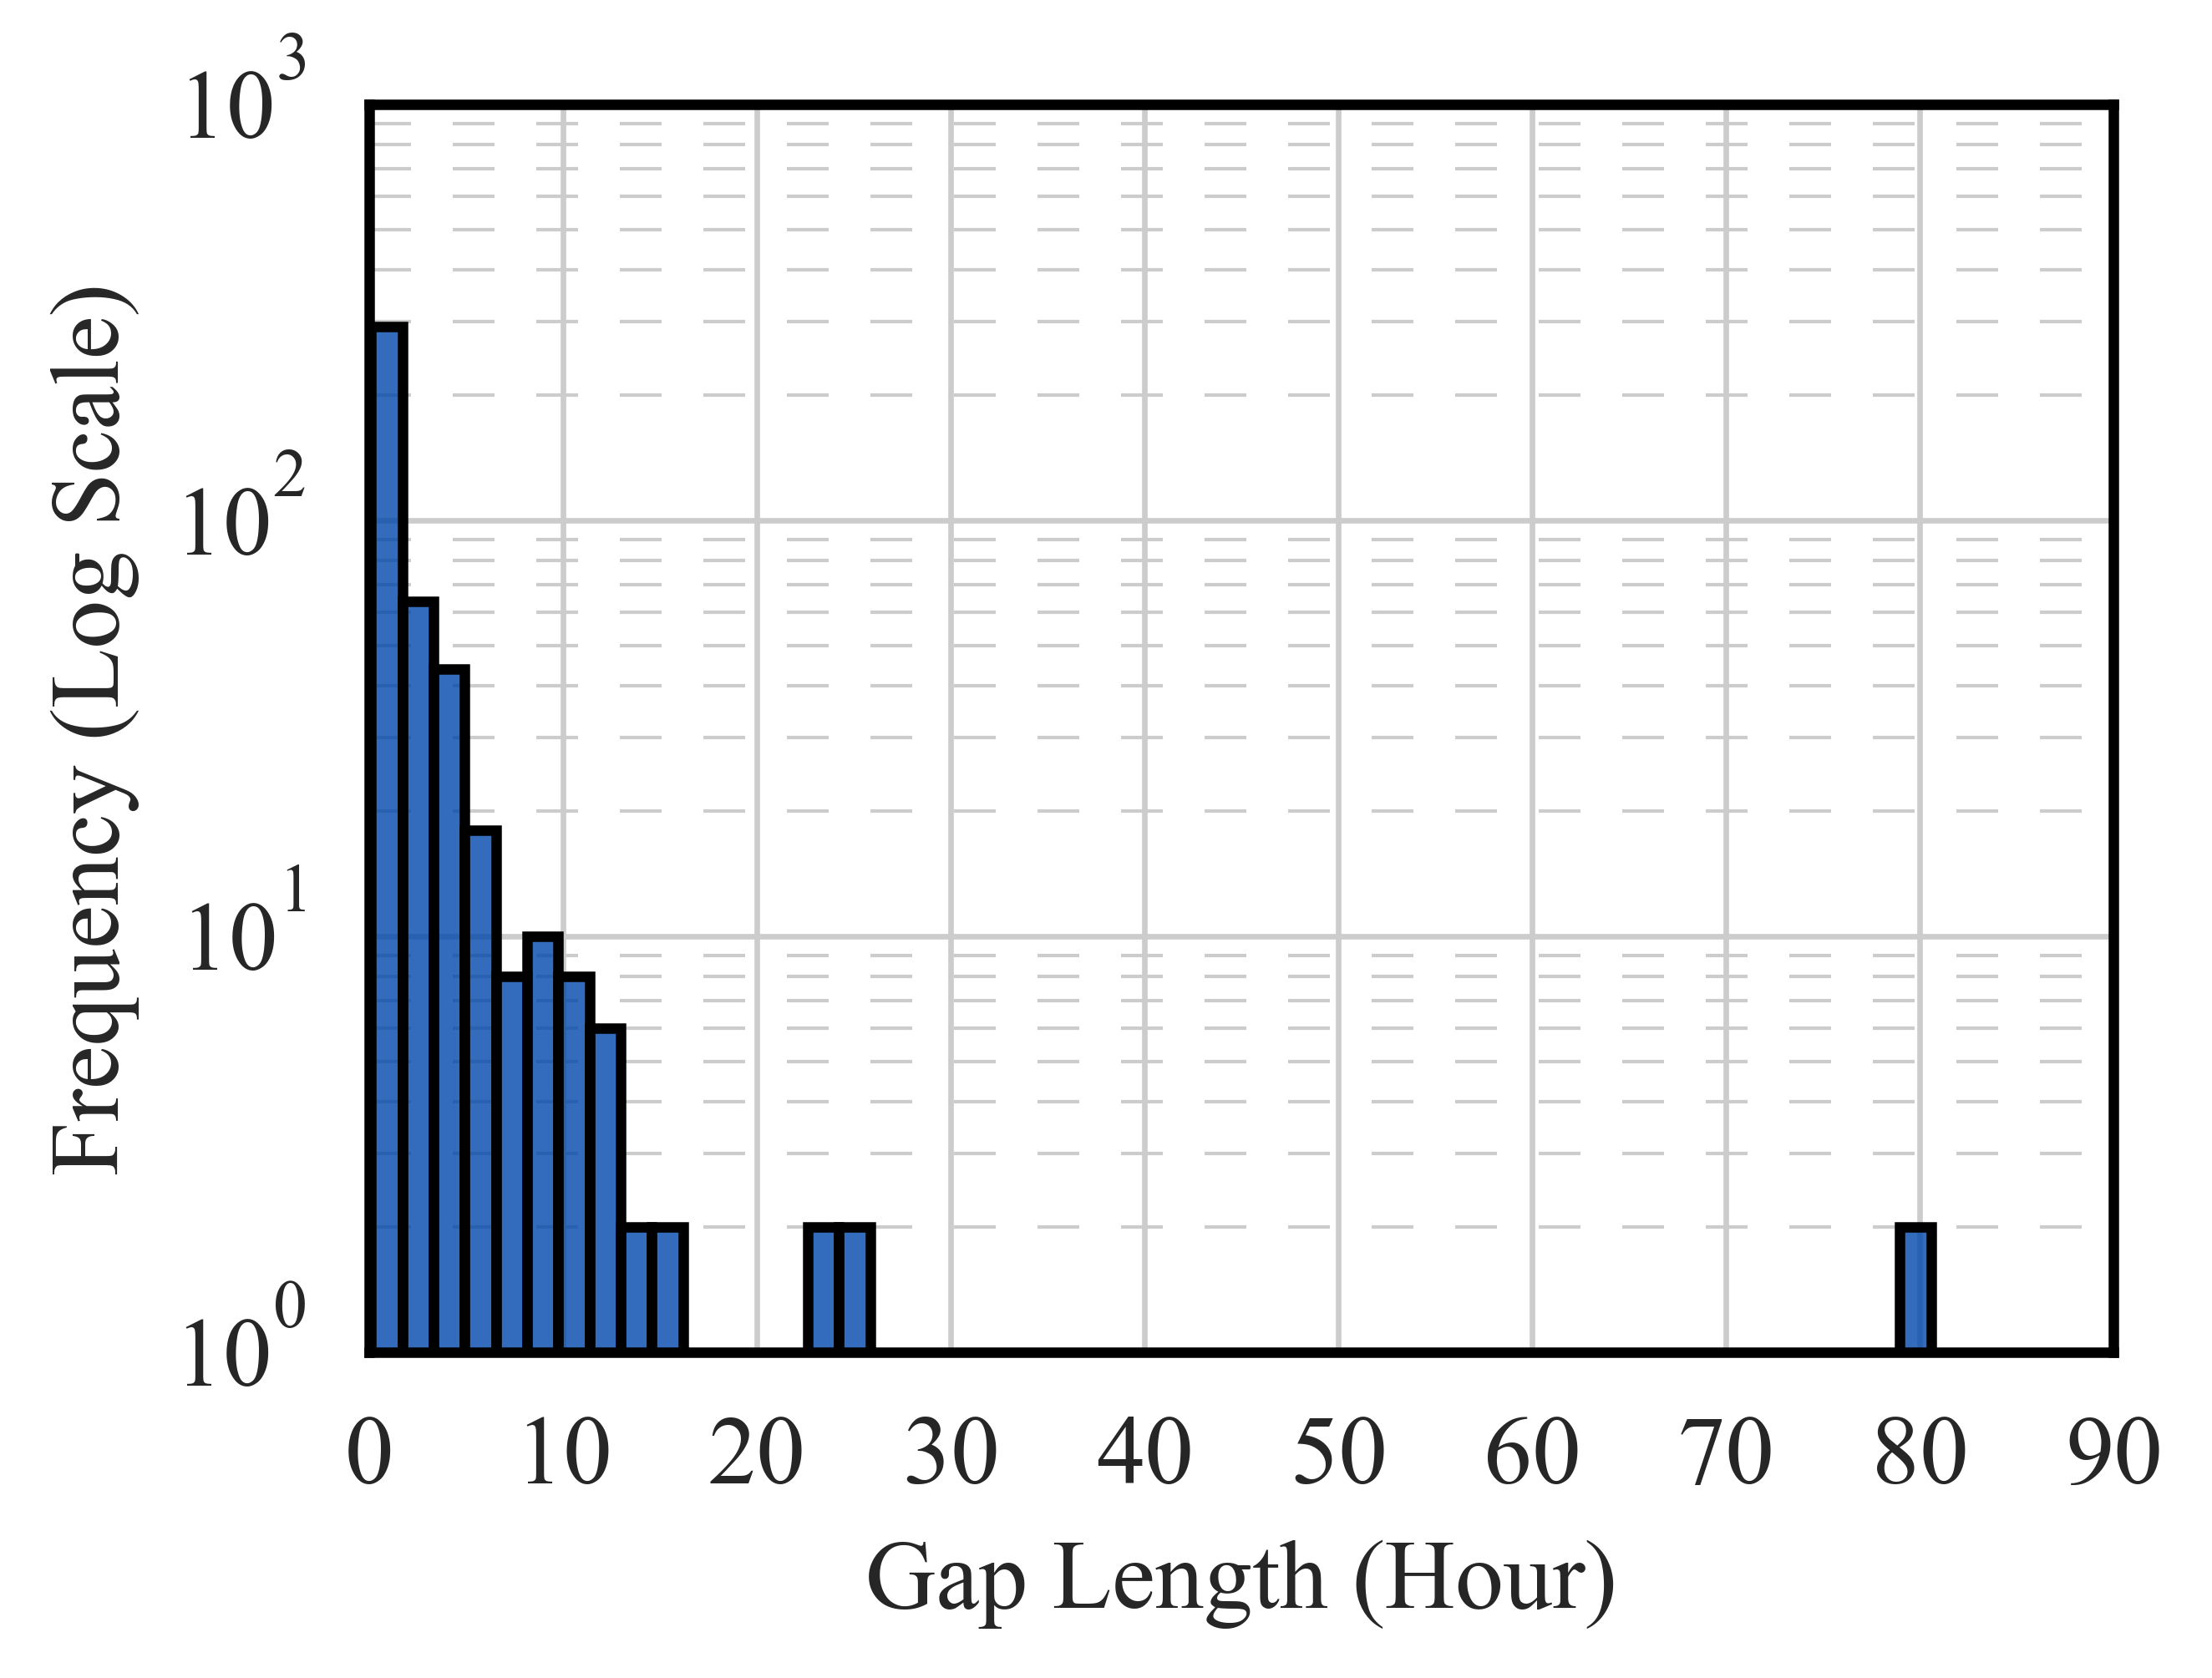

In [212]:
# Create the plot
plt.figure(figsize=(4, 3), dpi=600)
sns.histplot(flattened, bins=50, edgecolor='black', alpha=0.8, linewidth=1.5, color = '#0047ab')

# Set axis labels and scale
plt.xlabel("Gap Length (Hour)")
plt.ylabel("Frequency (Log Scale)")
plt.yscale('log')

# Add grids
plt.grid(True, which='major', linestyle='-', linewidth=0.8)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


# Skewness

In [306]:
all_series = []
for x in [input_folder, input_folder2]:
    for top, _, files in os.walk(input_folder):
        if files:
            sub_path = os.path.relpath(top, input_folder)
            print()

            csv_files = [file for file in os.listdir(top) if file.endswith(".csv")]

            for file in csv_files:
                file_path = os.path.join(top, file)
                # print(file_path)
                if top[-4:] != 'test':
                    df = pd.read_csv(file_path)
                    try:
                        df['ts'] = pd.to_datetime(df['ts'].astype(str), format="%d-%m-%Y %H:%M:%S")
                    except Exception as e:
                        df['ts'] = pd.to_datetime(df['ts'].astype(str), format="%Y-%m-%d %H:%M:%S")

                    df.set_index('ts', inplace=True)
                    all_series.append(df['value'].values)

In [307]:
from scipy.stats import skew
import numpy as np

# Example data: Replace these with your 12 series
series_list = all_series

# Analyze skewness for each series
log_transform_needed = []
for i, series in enumerate(series_list):
    skewness = skew(series)
    print(f"Series {i+1}: Skewness = {skewness:.2f}")
    if skewness > 0.5:  # Example threshold for right skewness
        log_transform_needed.append(True)
    else:
        log_transform_needed.append(False)

# Summary of results
for i, need_log in enumerate(log_transform_needed):
    print(f"Series {i+1}: {'Needs log scaling' if need_log else 'Does not need log scaling'}")


Series 1: Skewness = 0.64
Series 2: Skewness = 0.80
Series 3: Skewness = 0.03
Series 4: Skewness = 1.02
Series 5: Skewness = 0.52
Series 6: Skewness = 0.49
Series 7: Skewness = 0.64
Series 8: Skewness = 0.80
Series 9: Skewness = 0.03
Series 10: Skewness = 1.02
Series 11: Skewness = 0.52
Series 12: Skewness = 0.49
Series 1: Needs log scaling
Series 2: Needs log scaling
Series 3: Does not need log scaling
Series 4: Needs log scaling
Series 5: Needs log scaling
Series 6: Does not need log scaling
Series 7: Needs log scaling
Series 8: Needs log scaling
Series 9: Does not need log scaling
Series 10: Needs log scaling
Series 11: Needs log scaling
Series 12: Does not need log scaling


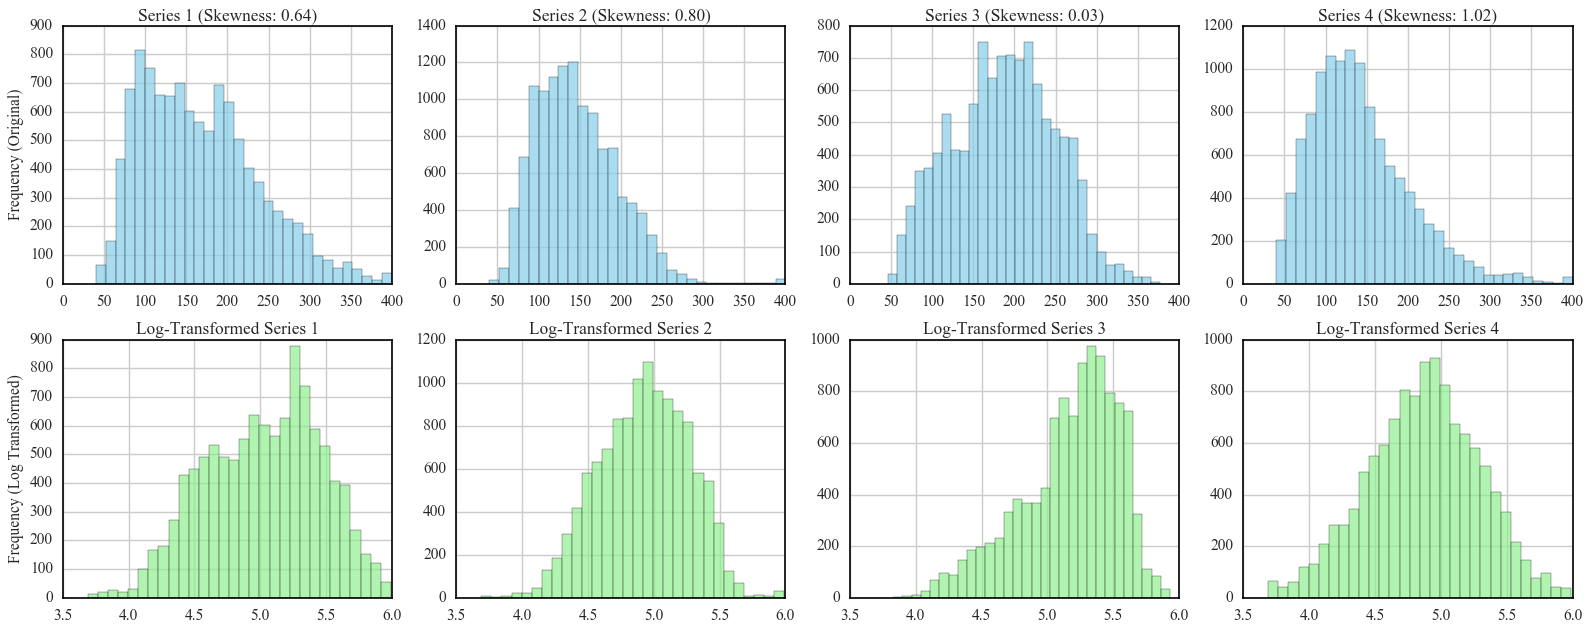

In [278]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, len(series_list[:4]), figsize=(20, 8))  # Compare for first 4 series as an example

for i, series in enumerate(series_list[:4]):  # Visualize first 4 series
    # Original data
    axes[0, i].hist(series, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, i].set_title(f"Series {i+1} (Skewness: {skew(series):.2f})")
    
    # Log-transformed data
    transformed = np.log(series)  # log1p avoids issues with zeros
    axes[1, i].hist(transformed, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[1, i].set_title(f"Log-Transformed Series {i+1}")

axes[0, 0].set_ylabel("Frequency (Original)")
axes[1, 0].set_ylabel("Frequency (Log Transformed)")
plt.tight_layout()
plt.show()

In [359]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

In [360]:

# Apply style
# plt.style.use("tableau-colorblind10")
plt.style.use("default")

# Set Times New Roman font and darker border
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelsize'] = 18     # Axis label font size
plt.rcParams['xtick.labelsize'] = 18      # X-tick font size
plt.rcParams['ytick.labelsize'] = 18      # Y-tick font size
plt.rcParams['legend.fontsize'] = 18      # Y-tick font size

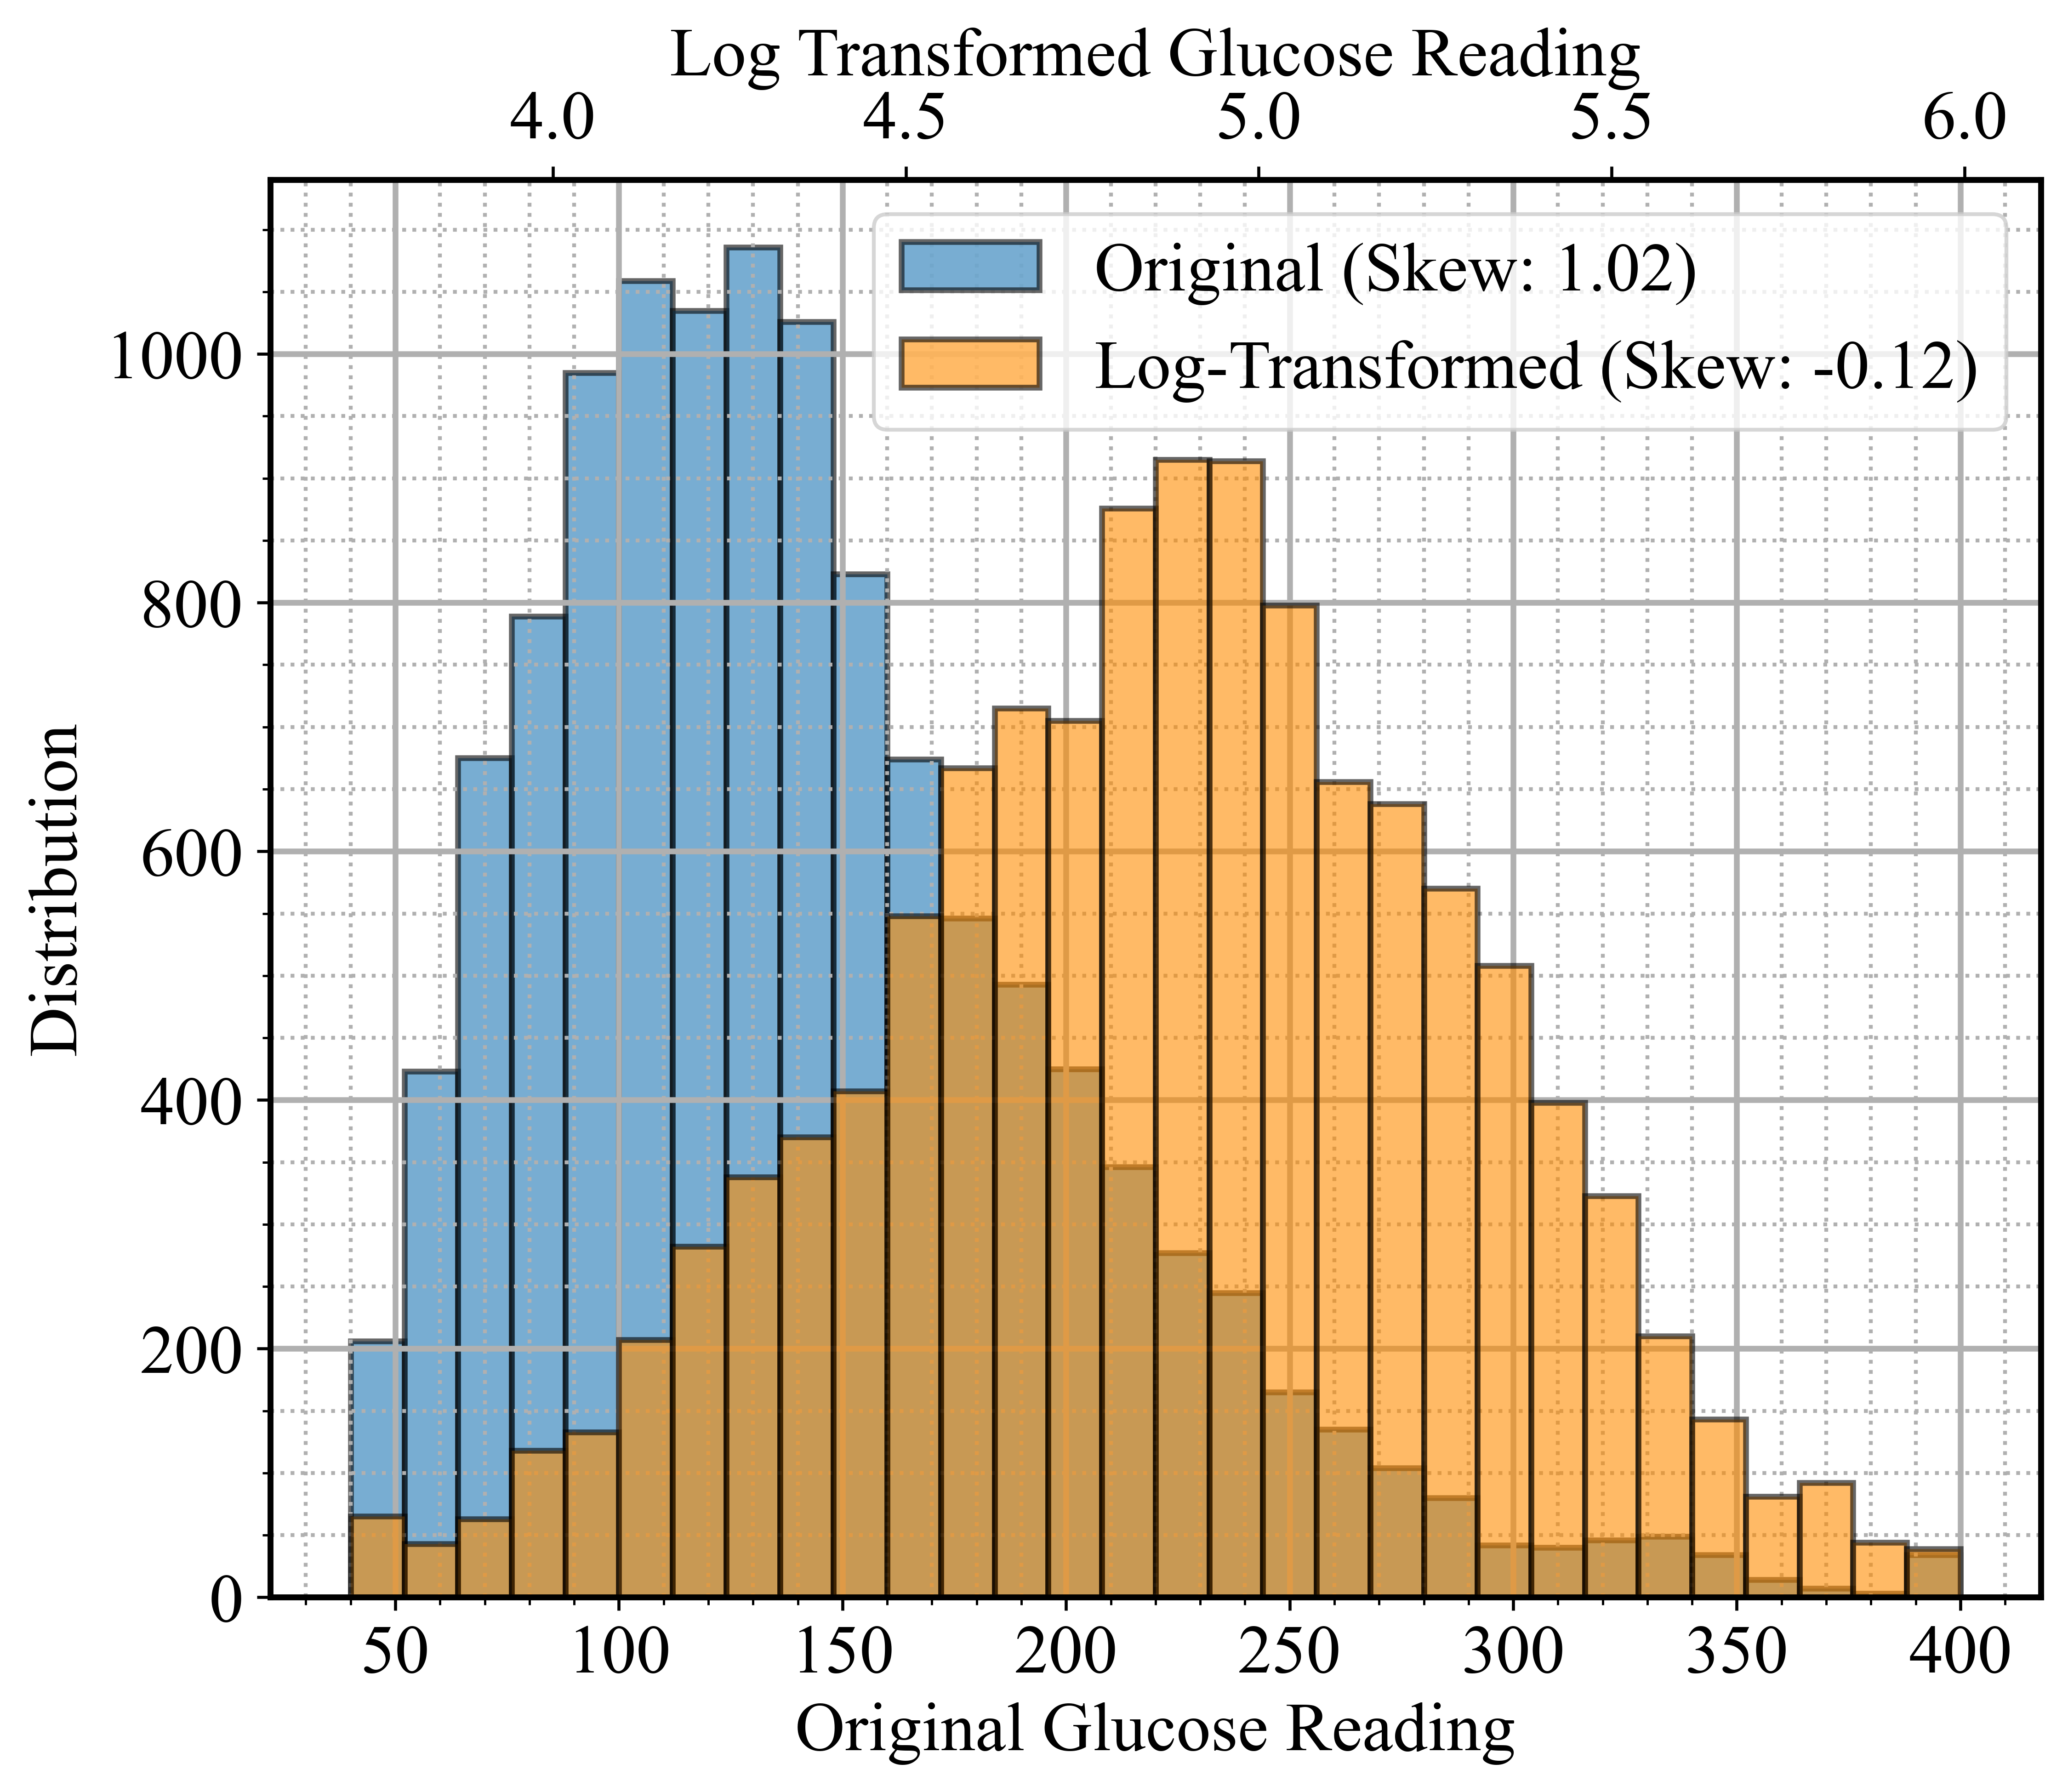

In [380]:
# Create a figure
fig, ax = plt.subplots(figsize=(7.6, 6.6), dpi =600)

# Calculate the skewness and plot all series on the primary x-axis (original values)
idx = 3
series = series_list[idx]
original_skewness = skew(series)
ax.hist(series, bins=30, alpha=0.6, label=f"Original (Skew: {original_skewness:.2f})",
        edgecolor='black', linewidth=1.5)

# Set labels for the primary x-axis
ax.set_xlabel("Original Glucose Reading")
ax.set_ylabel("Distribution")
# ax.legend(loc="upper right" , bbox_to_anchor=(1, 1))

# Create a twin x-axis for log-transformed values
ax2 = ax.twiny()

# Plot all series on the secondary x-axis (log-transformed values)
log_transformed = np.log1p(series)
log_skewness = skew(log_transformed)
ax2.hist(log_transformed, bins=30, alpha=0.6, label=f"Log-Transformed (Skew: {log_skewness:.2f})",
            edgecolor='black', color = '#FF8C00', linewidth=1.5 )

# Set labels for the secondary x-axis
ax2.set_xlabel("Log Transformed Glucose Reading")
# ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.92))

handles1, labels1 = ax.get_legend_handles_labels()  # Get legend items from primary axis
handles2, labels2 = ax2.get_legend_handles_labels()  # Get legend items from secondary axis
ax.legend(handles1 + handles2, labels1 + labels2, loc="upper right")  # Combined legend


ax.grid(True, which="major", linestyle="-", linewidth=1.5)  # Major grid
ax.grid(True, which="minor", linestyle=":", linewidth=1)  # Minor grid

ax.minorticks_on()

# ax.grid(True, which="both", linestyle="--", linewidth=1)  # Add grid to primary axis
ax2.grid(False)  # Ensure no overlapping grids from the secondary x-axis

# Show the plot
plt.tight_layout()
plt.show()

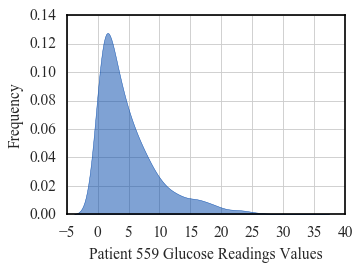

In [ ]:
# Create the plot
plt.figure(figsize=(4, 3))
# sns.histplot(series_list[0], color = '#0047ab', kde=True)
sns.kdeplot(series_list[0], color='#0047ab', fill=True, alpha=0.5, label='Original Readings')
# sns.kdeplot(np.log(series_list[0]), color='#0047ab', fill=True, alpha=0.5, label='Original Readings')

# Set axis labels and scale
plt.xlabel("Patient 559 Glucose Readings Values")
plt.ylabel("Frequency")
# plt.yscale('log')

# Add grids
plt.grid(True, which='major', linestyle='-', linewidth=0.8)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


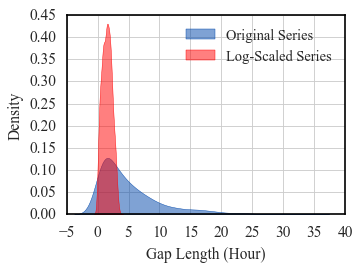

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data: Replace with your actual series
series_list = [np.random.exponential(scale=5, size=1000) for _ in range(1)]

# Log-transform the series
log_series = np.log1p(series_list[0])

# Define a common x-axis range
x_min = min(min(series_list[0]), min(log_series))
x_max = max(max(series_list[0]), max(log_series))
x_range = np.linspace(x_min, x_max, 500)

# Create the plot
plt.figure(figsize=(4, 3))

# Original series KDE with blue transparent fill
sns.kdeplot(series_list[0], color='#0047ab', fill=True, alpha=0.5, label='Original Series')

# Log-scaled series KDE with red transparent fill
sns.kdeplot(log_series, color='red', fill=True, alpha=0.5, label='Log-Scaled Series')

# Adjust x-axis range to a shared range
# plt.xlim(x_min, x_max)

# Set axis labels and legend
plt.xlabel("Gap Length (Hour)")
plt.ylabel("Density")
plt.legend()

# Add grids
plt.grid(True, which='major', linestyle='-', linewidth=0.8)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()
